### **PIA:** **Entrenamiento de una Red Neuronal Convolucional con el Conjunto de Datos MNIST**

Equipo 2:

Jennifer Yaretzy Ayala Vazquez  1896473  IMTC

Carlos Farid Barrera Garcia 2077849  IMTC

Johan Alexandro Barrera González 1911675  IMTC

Erick Daniel Chong Marines 1927455  IMTC

In [50]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()

logger.setLevel(logging.ERROR)


dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis', 'Siete', 'Ocho', 'Nueve']

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [51]:
#Escalar valores en un rango de 0 a 1
def normalize(img, labels):
    img = tf.cast(img, tf.float32)
    img /= 255
    return img, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [52]:
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(10, activation=tf.nn.softmax) ])

In [53]:
#Complacion del modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
#Aprendizaje por lotes de 32
BadBatch = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BadBatch)
test_dataset = test_dataset.batch(BadBatch)

In [55]:
model.fit(
	train_dataset, epochs=10,
	steps_per_epoch=math.ceil(num_train_examples/BadBatch) )

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.2684 - accuracy: 0.9218
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1232 - accuracy: 0.9633
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0933 - accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0732 - accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0533 - accuracy: 0.9834
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0406 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0370 - accuracy: 0.9878
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0332 - accuracy: 0.9889
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.02

313/313 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9720
Resultados del modelo: 0.972000002861023
1/1 [==============================] - 0s 52ms/step


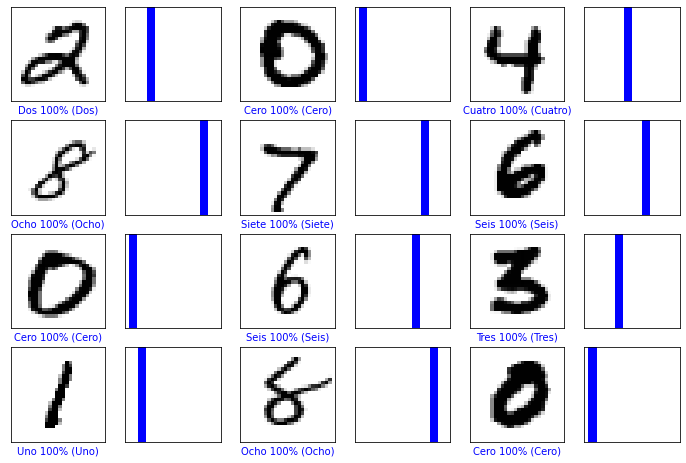

In [56]:
#Evaluación del modelo con el dataset
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32) )

print("Resultados del modelo:", test_accuracy)


for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, img):
	predictions_array, true_label, imgs = predictions_array[i], true_labels[i], img[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(imgs[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=4
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()